# Graduate Rotational Internship Program

**Task-3      
To Explore Unsupervised Machine Learning**

**K-Means Clustering**

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

**Import required libraries**

In [ ]:
## import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

**Loading the iris dataset**

In [ ]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Exploring the data**

In [ ]:
# Shape of dataset
print('Shape of data: ',df.shape)

Shape of data:  (150, 4)


This dataset consists of 150 rows and 4 columns.

**Statistical Summary**

In [ ]:
# Describe the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By describing data,we can find overall mean,percentiles,standard deviations,minimum and maximum of each feature.

In [ ]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From above information, we can say that there are no missing values.

**Data Visualization**

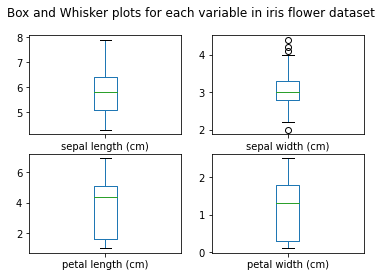

In [ ]:
# Box and Whisker plots
df.plot(kind='box',subplots=True,layout=(2,2),title='Box and Whisker plots for each variable in iris flower dataset')
plt.show()

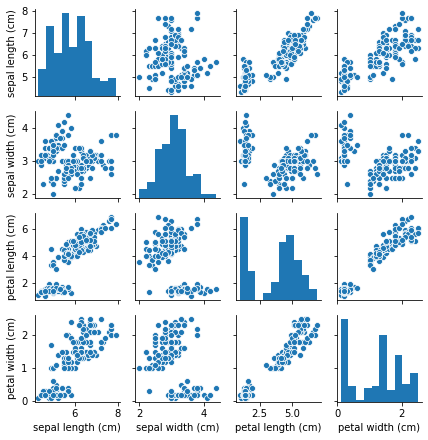

In [ ]:
import seaborn as sns
sns.pairplot(df,height=1.5)

Seperate dataset into dependent and independent variable

In [ ]:
array=df.values
X=array[ :,[0,1,2,3]]
y=iris.target

**To find optimum number of clusters,we use elbow method.**

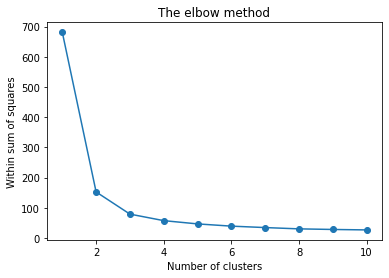

In [ ]:
# To find optimal number of clusters,we use elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,
             init='k-means++',
            n_init=10,
            max_iter=300,
           random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within sum of squares')
plt.show()

As we can see in the above plot, the elbow is located at k=3.

From above plot,optimum cluster count is 3.

Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.



**Creating** **the K-Means Classifier**

In [ ]:
# Create K-Means classifier
km = KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=300, random_state=0)

#Fitting K-Means clustering to the dataset
y_km = km.fit_predict(X)

**Visualizing the clusters**

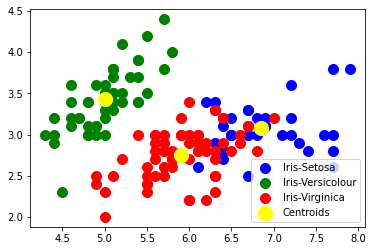

In [ ]:
# Visualize the clusters 
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=100, c='blue',  label='Iris-Setosa')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=100, c='green', label='Iris-Versicolour')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=100, c='red',label='Iris-Virginica')
#Plot the centroids of the clusters
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, marker='o', c='yellow', label='Centroids')
plt.legend()
